# Transform and preparation

The goal of this notebook is to perform transformation and preparation for analysis

In [9]:
import geopandas as gpd
import missingno as msno
import pandas as pd
import pyproj

In [10]:
stations_gpd = gpd.read_file('../../data/atom/stations.json', driver='GeoJSON')
verzorgingsgebied_gpd = gpd.read_file('../../data/atom/indicatief_verzorgingsgebied.json', driver='GeoJSON')

In [11]:
stations_gpd_crs = stations_gpd.to_crs(pyproj.CRS.from_epsg(4326))
verzorgingsgebied_gpd_crs = verzorgingsgebied_gpd.to_crs(pyproj.CRS.from_epsg(4326))

In [12]:
stations_gpd_crs.head()

,id,station,netbeheerder,status,totaleCapaciteitInvoedingMva,totaleCapaciteitAfnameMva,beschikbareCapaciteitInvoedingHuidigMva,beschikbareCapaciteitAfnameHuidigMva,verwachtJaarVanOverbelastingInvoeding,verwachtJaarVanOverbelastingAfname,...,peildatum,beschikbareCapaciteitAfname3JaarMvaVisualisatie,beschikbareCapaciteitAfname5JaarMvaVisualisatie,beschikbareCapaciteitAfname10JaarMvaVisualisatie,beschikbareCapaciteitAfnameHuidigMvaVisualisatie,beschikbareCapaciteitInvoeding3JaarMvaVisualisatie,beschikbareCapaciteitInvoeding5JaarMvaVisualisatie,beschikbareCapaciteitInvoeding10JaarMvaVisualisatie,beschikbareCapaciteitInvoedingHuidigMvaVisualisatie,geometry
0,stations.34bda653-e4ae-4a3b-9399-c59f9f730745,Krimpen_Langeland 50 kV,Stedin,Bestaand,117.0,117.0,142,12,2050,2026,...,2022/10/18,0,0,0,12,0,0,0,142,POINT (4.62915 51.91080)
1,stations.b3b5f7d2-8fb9-4b44-9fe8-cdecd171eceb,Rotterdam Ommoord 25 kV,Stedin,Bestaand,115.0,115.0,157,-30,2050,2050,...,2022/10/18,0,0,0,0,149,148,142,157,POINT (4.52947 51.95541)
2,stations.57fc548f-9089-4e24-ab62-7555f0035b4b,Gouda Ijsseldijk 50 kV,Stedin,Bestaand,200.0,200.0,185,48,2045,2035,...,2022/10/18,22,13,0,48,203,176,121,185,POINT (4.73411 52.00775)
3,stations.600e067d-26f2-4f1a-944b-54d47534ba72,Delft 1 25 kV,Stedin,Bestaand,187.0,187.0,205,46,2050,2027,...,2022/10/18,15,4,0,46,201,191,160,205,POINT (4.36754 51.98904)
4,stations.5c7d27cc-871e-4c39-aa64-2186cb674d25,Grindweg 25 kV,Stedin,Bestaand,40.0,40.0,48,5,2050,2026,...,2022/10/18,3,0,0,5,38,36,30,48,POINT (4.49639 51.96228)


In [13]:
verzorgingsgebied_gpd_crs.head()

,id,station,netbeheerder,status,totaleCapaciteitInvoedingMva,totaleCapaciteitAfnameMva,beschikbareCapaciteitInvoedingHuidigMva,beschikbareCapaciteitAfnameHuidigMva,verwachtJaarVanOverbelastingInvoeding,verwachtJaarVanOverbelastingAfname,...,peildatum,beschikbareCapaciteitAfname3JaarMvaVisualisatie,beschikbareCapaciteitAfname5JaarMvaVisualisatie,beschikbareCapaciteitAfname10JaarMvaVisualisatie,beschikbareCapaciteitAfnameHuidigMvaVisualisatie,beschikbareCapaciteitInvoeding3JaarMvaVisualisatie,beschikbareCapaciteitInvoeding5JaarMvaVisualisatie,beschikbareCapaciteitInvoeding10JaarMvaVisualisatie,beschikbareCapaciteitInvoedingHuidigMvaVisualisatie,geometry
0,indicatief_verzorgingsgebied.3f7b1732-778d-4b1...,Wittevrouweveld,Enexis,Bestaand,35,35,34,10,2028,>2035,...,2022/12/14,10,10,10,10,34,34,34,34,"MULTIPOLYGON (((5.66455 50.83226, 5.70274 50.8..."
1,indicatief_verzorgingsgebied.0a727e27-ba60-487...,Boschpoort,Enexis,Bestaand,45,45,6,23,2023,>2035,...,2022/12/14,23,23,23,23,6,6,6,6,"MULTIPOLYGON (((5.64897 50.82704, 5.64918 50.8..."
2,indicatief_verzorgingsgebied.ed973a51-edcc-40e...,Heer,Enexis,Bestaand,40,40,38,0,2028,2023,...,2022/12/14,0,0,0,0,38,38,38,38,"MULTIPOLYGON (((5.83113 50.75886, 5.83102 50.7..."
3,indicatief_verzorgingsgebied.9e164099-7d30-41a...,Schoonbron,Enexis,Bestaand,45,47,0,0,2023,2023,...,2022/12/14,0,0,0,0,0,0,0,0,"MULTIPOLYGON (((5.91508 50.75040, 5.91508 50.7..."
4,indicatief_verzorgingsgebied.adc9060f-a6b2-4dd...,Terwinselen,Enexis,Bestaand,110,116,0,0,2023,2023,...,2022/12/14,0,0,0,0,0,0,0,0,"MULTIPOLYGON (((6.05465 50.92368, 6.05450 50.9..."


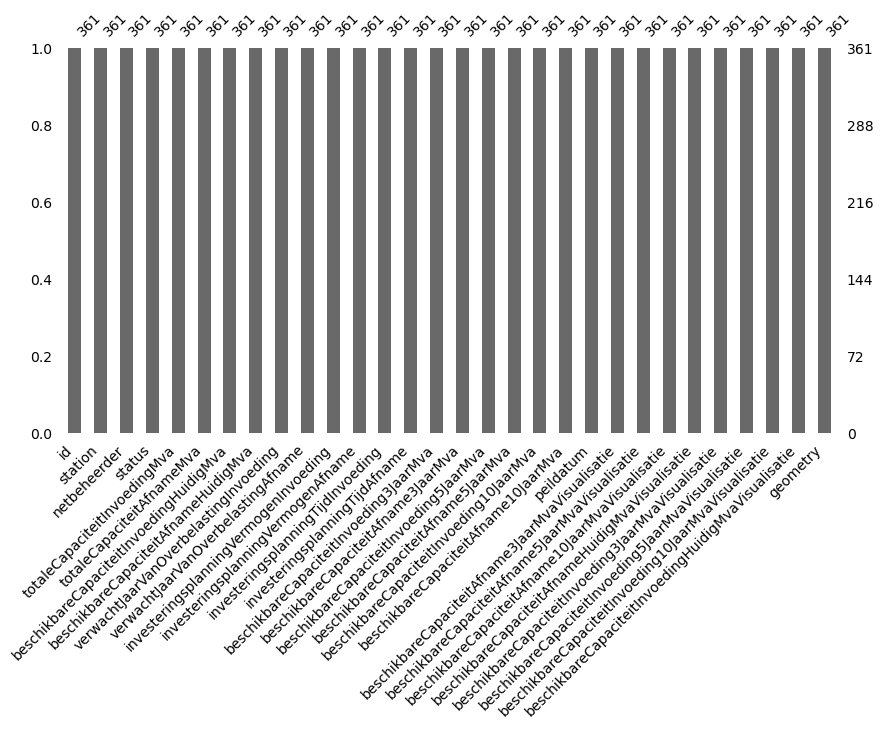

In [14]:
msno.bar(stations_gpd_crs, figsize=(10,5), fontsize=10);

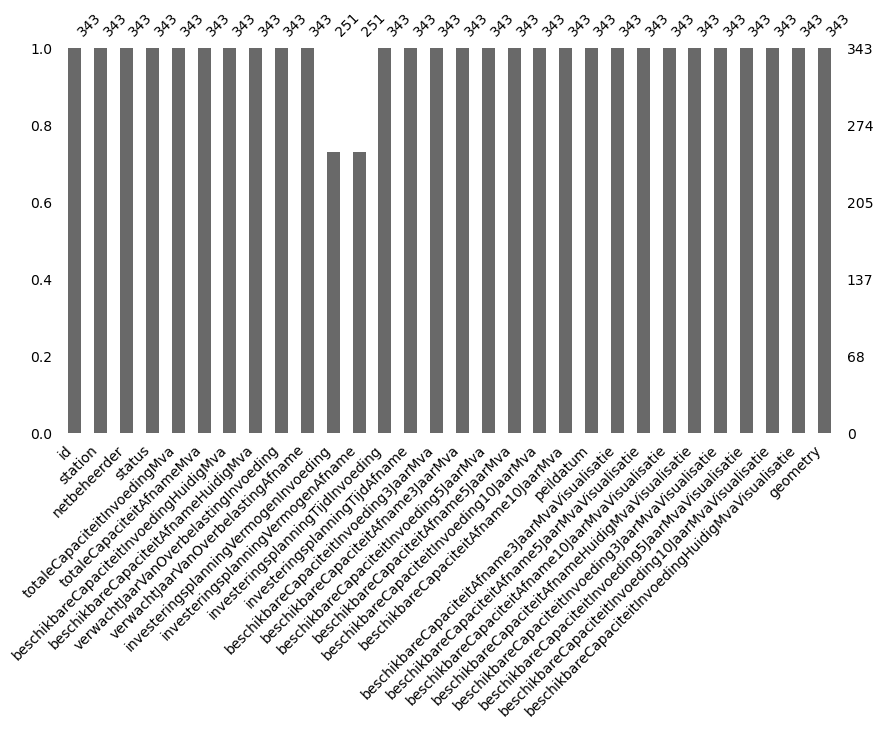

In [15]:
msno.bar(verzorgingsgebied_gpd_crs, figsize=(10,5), fontsize=10);

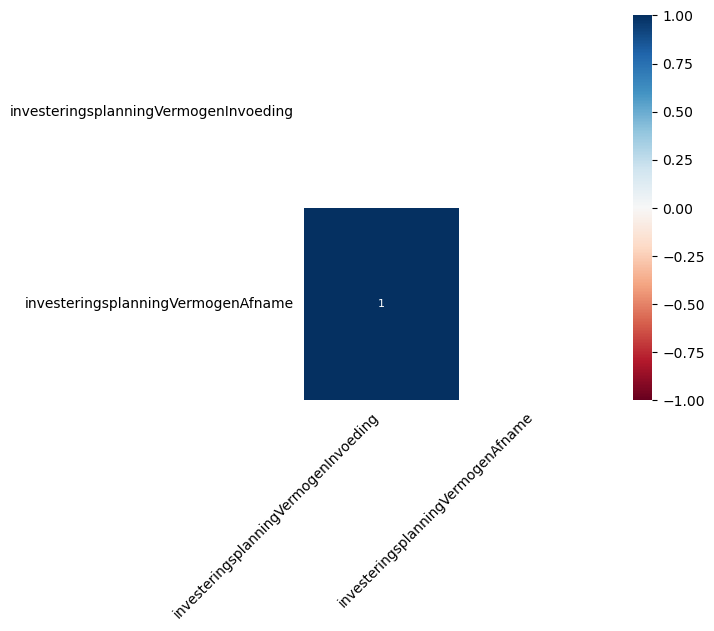

In [16]:
msno.heatmap(verzorgingsgebied_gpd_crs, figsize=(5,5), fontsize=10);

# Data quality

## Stations

In [17]:
stations_gpd_crs.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 30 columns):
 #   Column                                               Non-Null Count  Dtype   
---  ------                                               --------------  -----   
 0   id                                                   361 non-null    object  
 1   station                                              361 non-null    object  
 2   netbeheerder                                         361 non-null    object  
 3   status                                               361 non-null    object  
 4   totaleCapaciteitInvoedingMva                         361 non-null    float64 
 5   totaleCapaciteitAfnameMva                            361 non-null    float64 
 6   beschikbareCapaciteitInvoedingHuidigMva              361 non-null    object  
 7   beschikbareCapaciteitAfnameHuidigMva                 361 non-null    object  
 8   verwachtJaarVanOverbelastingInvoeding               

Logical values exist in certain columns

- beschikbareCapaciteitInvoedingHuidigMva: < 2 -> 1
- beschikbareCapaciteitAfnameHuidigMva: < 2 -> 1
- verwachtJaarVanOverbelastingInvoeding: >2035, 'n.v.t', ''
- verwachtJaarVanOverbelastingAfname: >2035, 'na 2031', ''
- investeringsplanningTijdInvoeding: >2031
- investeringsplanningTijdAfname: >2031
- beschikbareCapaciteitInvoeding3JaarMva: 'Congestie onderzoek', 'Onbekend' and >2 -> 1
- beschikbareCapaciteitAfname3JaarMva: 'Congestie onderzoek', 'Onbekend' and >2 -> 1
- beschikbareCapaciteitInvoeding5JaarMva: 'Congestie onderzoek', 'Onbekend' and >2 -> 1
- beschikbareCapaciteitAfname5JaarMva: 'Congestie onderzoek', 'Onbekend' and >2 -> 1
- beschikbareCapaciteitInvoeding10JaarMva: 'Congestie onderzoek', 'Onbekend' and >2 -> 1
- beschikbareCapaciteitAfname10JaarMva: 'Congestie onderzoek', 'Onbekend' and >2 -> 1

Features with varying units
- investeringsplanningVermogenInvoeding: MVA, kV and 'increase capacity'
- investeringsplanningVermogenAfname: MVA, kV and 'increase capacity'

After analysing the data quality, we will now perform substitutions

In [67]:
def substitute(data, dtype):
    return data.replace('<2', '1').replace(['Congestieonderzoek', 'Onbekend', ''], '0').astype(dtype)

In [38]:
target = ['beschikbareCapaciteitInvoedingHuidigMva', 'beschikbareCapaciteitAfnameHuidigMva', 'beschikbareCapaciteitInvoeding3JaarMva', 'beschikbareCapaciteitAfname3JaarMva',
          'beschikbareCapaciteitInvoeding5JaarMva', 'beschikbareCapaciteitAfname5JaarMva', 'beschikbareCapaciteitInvoeding10JaarMva', 'beschikbareCapaciteitAfname10JaarMva']

for t in target:
    result = substitute(stations_gpd_crs[t], float)
    stations_gpd_crs[t] = result

In [68]:
import re

def year_cleaner(data):
    return data.apply(lambda x: re.search('\d{4}', x).group() if re.search('\d{4}', x) else '0').astype(int)

In [62]:
target = ['verwachtJaarVanOverbelastingInvoeding', 'verwachtJaarVanOverbelastingAfname', 'investeringsplanningTijdInvoeding', 'investeringsplanningTijdAfname']

for t in target:
    result = year_cleaner(stations_gpd_crs[t])
    stations_gpd_crs[t] = result

Fix date format

In [64]:
stations_gpd_crs.peildatum = pd.to_datetime(stations_gpd.peildatum, dayfirst=True)

In [150]:
t = ['onbekend', '', 'Capaciteit kabel verhogen']

stations_gpd_crs.investeringsplanningVermogenInvoeding = stations_gpd_crs.investeringsplanningVermogenInvoeding.replace(t, '0')
stations_gpd_crs.investeringsplanningVermogenAfname = stations_gpd_crs.investeringsplanningVermogenAfname.replace(t, '0')

### Store as parquet

In [148]:
stations_gpd_crs.to_parquet('../../data/atom/stations.parquet', index=False)

## Verzorgingsgebied

In [149]:
verzorgingsgebied_gpd_crs.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 30 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   id                                                   343 non-null    object        
 1   station                                              343 non-null    object        
 2   netbeheerder                                         343 non-null    object        
 3   status                                               343 non-null    object        
 4   totaleCapaciteitInvoedingMva                         343 non-null    int64         
 5   totaleCapaciteitAfnameMva                            343 non-null    int64         
 6   beschikbareCapaciteitInvoedingHuidigMva              343 non-null    float64       
 7   beschikbareCapaciteitAfnameHuidigMva                 343 non-null    float64     

Fix date format

Logical values exist in certain columns

- beschikbareCapaciteitInvoedingHuidigMva: 'Congestie onderzoek', 'Onbekend' and >2
- beschikbareCapaciteitAfnameHuidigMva: 'Congestie onderzoek', 'Onbekend' and >2

- verwachtJaarVanOverbelastingInvoeding: >2035, 'n.v.t', ''
- verwachtJaarVanOverbelastingAfname: >2035, 'na 2031', ''
- investeringsplanningTijdInvoeding: >2035, 'geen investering gepland', ''
- investeringsplanningTijdAfname: >2035, 'geen investering gepland', ''

- beschikbareCapaciteitInvoeding3JaarMva: 'Congestie onderzoek', 'Onbekend' and >2
- beschikbareCapaciteitAfname3JaarMva: 'Congestie onderzoek', 'Onbekend' and >2
- beschikbareCapaciteitInvoeding5JaarMva: 'Congestie onderzoek', 'Onbekend' and >2
- beschikbareCapaciteitAfname5JaarMva: 'Congestie onderzoek', 'Onbekend' and >2
- beschikbareCapaciteitInvoeding10JaarMva: 'Congestie onderzoek', 'Onbekend' and >2
- beschikbareCapaciteitAfname10JaarMva: 'Congestie onderzoek', 'Onbekend' and >2

In [69]:
target = ['beschikbareCapaciteitInvoedingHuidigMva', 'beschikbareCapaciteitAfnameHuidigMva', 'beschikbareCapaciteitInvoeding3JaarMva', 'beschikbareCapaciteitAfname3JaarMva',
          'beschikbareCapaciteitInvoeding5JaarMva', 'beschikbareCapaciteitAfname5JaarMva', 'beschikbareCapaciteitInvoeding10JaarMva', 'beschikbareCapaciteitAfname10JaarMva']

for t in target:
    result = substitute(verzorgingsgebied_gpd_crs[t], float)
    verzorgingsgebied_gpd_crs[t] = result

In [70]:
target = ['verwachtJaarVanOverbelastingInvoeding', 'verwachtJaarVanOverbelastingAfname', 'investeringsplanningTijdInvoeding', 'investeringsplanningTijdAfname']

for t in target:
    result = year_cleaner(verzorgingsgebied_gpd_crs[t])
    verzorgingsgebied_gpd_crs[t] = result

In [71]:
verzorgingsgebied_gpd_crs.peildatum = pd.to_datetime(verzorgingsgebied_gpd_crs.peildatum, dayfirst=True)

In [155]:
verzorgingsgebied_gpd_crs.investeringsplanningVermogenInvoeding = verzorgingsgebied_gpd_crs.investeringsplanningVermogenInvoeding.fillna(0)
verzorgingsgebied_gpd_crs.investeringsplanningVermogenAfname = verzorgingsgebied_gpd_crs.investeringsplanningVermogenAfname.fillna(0)

### Store as Parquet

In [160]:
verzorgingsgebied_gpd_crs.to_parquet('../../data/atom/verzorgingsgebied.parquet', index=False)

## Analyse timeliness of both data sets

In [76]:
cols = verzorgingsgebied_gpd_crs.iloc[:, 4:20].columns

In [157]:
import numpy as np

# Determine lowest L dynamically
L = np.min([len(verzorgingsgebied_gpd_crs), len(stations_gpd_crs)])

verzorgingsgebied = verzorgingsgebied_gpd_crs.iloc[:L, :]
stations = stations_gpd_crs.iloc[:L, :]

# merge in order to align levels
merged = pd.merge(verzorgingsgebied, stations, on='station')

print('Verzorgingsgebied vs Stations')

for c in cols:
    x = set(merged[f'{c}_x']) # col from verzorgings
    y = set(merged[f'{c}_y']) # col from stations

    # determine similarity
    sim = len(x.intersection(y)) / len(x.union(y))

    print(f'sim: {round(sim, 2)} \t {c}')

Verzorgingsgebied vs Stations
sim: 0.98 	 totaleCapaciteitInvoedingMva
sim: 0.98 	 totaleCapaciteitAfnameMva
sim: 1.0 	 beschikbareCapaciteitInvoedingHuidigMva
sim: 1.0 	 beschikbareCapaciteitAfnameHuidigMva
sim: 1.0 	 verwachtJaarVanOverbelastingInvoeding
sim: 1.0 	 verwachtJaarVanOverbelastingAfname
sim: 0.0 	 investeringsplanningVermogenInvoeding
sim: 0.0 	 investeringsplanningVermogenAfname
sim: 1.0 	 investeringsplanningTijdInvoeding
sim: 1.0 	 investeringsplanningTijdAfname
sim: 1.0 	 beschikbareCapaciteitInvoeding3JaarMva
sim: 1.0 	 beschikbareCapaciteitAfname3JaarMva
sim: 1.0 	 beschikbareCapaciteitInvoeding5JaarMva
sim: 1.0 	 beschikbareCapaciteitAfname5JaarMva
sim: 1.0 	 beschikbareCapaciteitInvoeding10JaarMva
sim: 1.0 	 beschikbareCapaciteitAfname10JaarMva


Verzorgingsgebied vs Stations
sim: 0.98 	 totaleCapaciteitInvoedingMva
sim: 0.98 	 totaleCapaciteitAfnameMva
sim: 1.0 	 beschikbareCapaciteitInvoedingHuidigMva
sim: 1.0 	 beschikbareCapaciteitAfnameHuidigMva
sim: 1.0 	 verwachtJaarVanOverbelastingInvoeding
sim: 1.0 	 verwachtJaarVanOverbelastingAfname
sim: 0.0 	 investeringsplanningVermogenInvoeding
sim: 0.0 	 investeringsplanningVermogenAfname
sim: 1.0 	 investeringsplanningTijdInvoeding
sim: 1.0 	 investeringsplanningTijdAfname
sim: 1.0 	 beschikbareCapaciteitInvoeding3JaarMva
sim: 1.0 	 beschikbareCapaciteitAfname3JaarMva
sim: 1.0 	 beschikbareCapaciteitInvoeding5JaarMva
sim: 1.0 	 beschikbareCapaciteitAfname5JaarMva
sim: 1.0 	 beschikbareCapaciteitInvoeding10JaarMva
sim: 1.0 	 beschikbareCapaciteitAfname10JaarMva

In [158]:
merged.peildatum_x.subtract(merged.peildatum_y).value_counts()

0 days    325
dtype: int64